<a href="https://colab.research.google.com/github/piyuhwaghmare/Datamining_and_warehousing_practical/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

#Loading Dataset

df = pd.read_csv('tested.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [31]:
from sklearn.preprocessing import MinMaxScaler

#Normalization using minmaxscaler

numeric_columns = ['Age', 'Fare']

scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex       Age  SibSp  \
0                              Kelly, Mr. James    male  0.452723      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  0.617566      1   
2                     Myles, Mr. Thomas Francis    male  0.815377      0   
3                              Wirz, Mr. Albert    male  0.353818      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  0.287881      1   

   Parch   Ticket      Fare Cabin Embarked  
0      0   330911  0.015282   NaN        Q  
1      0   363272  0.013663   NaN        S  
2      0   240276  0.018909   NaN        Q  
3      0   315154  0.016908   NaN        S  
4      1  3101298  0.023984   NaN        S  


In [32]:
print(df.isnull().sum())

#checking null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [33]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

#Filling median or mean at null places

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


/tmp/ipython-input-33-2809975831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-33-2809975831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [34]:
print(df.dtypes)

#datatypes of all columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [35]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df.head())

#one-hot encoding

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name       Age  SibSp  Parch  \
0                              Kelly, Mr. James  0.452723      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  0.617566      1      0   
2                     Myles, Mr. Thomas Francis  0.815377      0      0   
3                              Wirz, Mr. Albert  0.353818      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  0.287881      1      1   

    Ticket      Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0   330911  0.015282   NaN      True        True       False  
1   363272  0.013663   NaN     False       False        True  
2   240276  0.018909   NaN      True        True       False  
3   315154  0.016908   NaN      True       False        True  
4  3101298  0.023

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Cabin'] = le.fit_transform(df['Cabin'])
print(df.head())

#label encoding

   PassengerId  Survived  Pclass  Name       Age  SibSp  Parch  Ticket  \
0          892         0       3   206  0.452723      0      0     152   
1          893         1       3   403  0.617566      1      0     221   
2          894         0       2   269  0.815377      0      0      73   
3          895         0       3   408  0.353818      0      0     147   
4          896         1       3   178  0.287881      1      1     138   

       Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0  0.015282     76      True        True       False  
1  0.013663     76     False       False        True  
2  0.018909     76      True        True       False  
3  0.016908     76      True       False        True  
4  0.023984     76     False       False        True  


In [37]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [38]:
bool_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S']
df[bool_cols] = df[bool_cols].astype(int)

#converted boolean to integet (True = 1 and False = 0)

In [25]:
print(df.head())

   PassengerId  Survived  Pclass  Name       Age  SibSp  Parch  Ticket  \
0          892         0       3   206  0.452723      0      0     152   
1          893         1       3   403  0.617566      1      0     221   
2          894         0       2   269  0.815377      0      0      73   
3          895         0       3   408  0.353818      0      0     147   
4          896         1       3   178  0.287881      1      1     138   

       Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0  0.015282     76         1           1           0  
1  0.013663     76         0           0           1  
2  0.018909     76         1           1           0  
3  0.016908     76         1           0           1  
4  0.023984     76         0           0           1  


In [39]:
print(df.describe())

       PassengerId    Survived      Pclass        Name         Age  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550  208.500000    0.388096   
std     120.810458    0.481622    0.841838  120.810458    0.167530   
min     892.000000    0.000000    1.000000    0.000000    0.000000   
25%     996.250000    0.000000    1.000000  104.250000    0.301068   
50%    1100.500000    0.000000    3.000000  208.500000    0.353818   
75%    1204.750000    1.000000    3.000000  312.750000    0.469207   
max    1309.000000    1.000000    3.000000  417.000000    1.000000   

            SibSp       Parch      Ticket        Fare       Cabin    Sex_male  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.447368    0.392344  180.944976    0.069441   67.437799    0.636364   
std      0.896760    0.981429  107.533763    0.109012   19.091405    0.481622   
min      0.000000    0.000000    0.000000    

In [40]:
df.drop('Cabin', axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass  Name       Age  SibSp  Parch  Ticket  \
0          892         0       3   206  0.452723      0      0     152   
1          893         1       3   403  0.617566      1      0     221   
2          894         0       2   269  0.815377      0      0      73   
3          895         0       3   408  0.353818      0      0     147   
4          896         1       3   178  0.287881      1      1     138   

       Fare  Sex_male  Embarked_Q  Embarked_S  
0  0.015282         1           1           0  
1  0.013663         0           0           1  
2  0.018909         1           1           0  
3  0.016908         1           0           1  
4  0.023984         0           0           1  


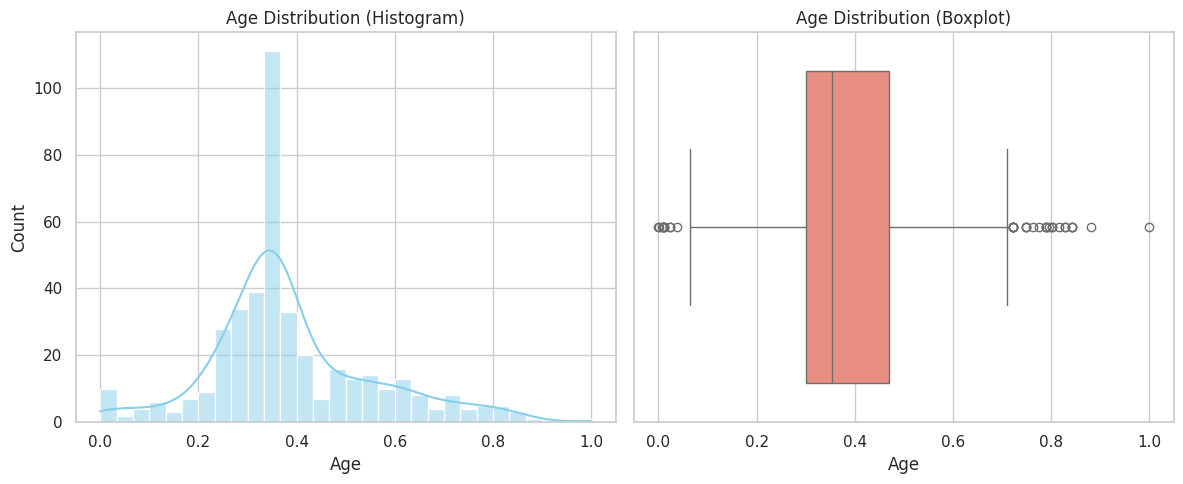

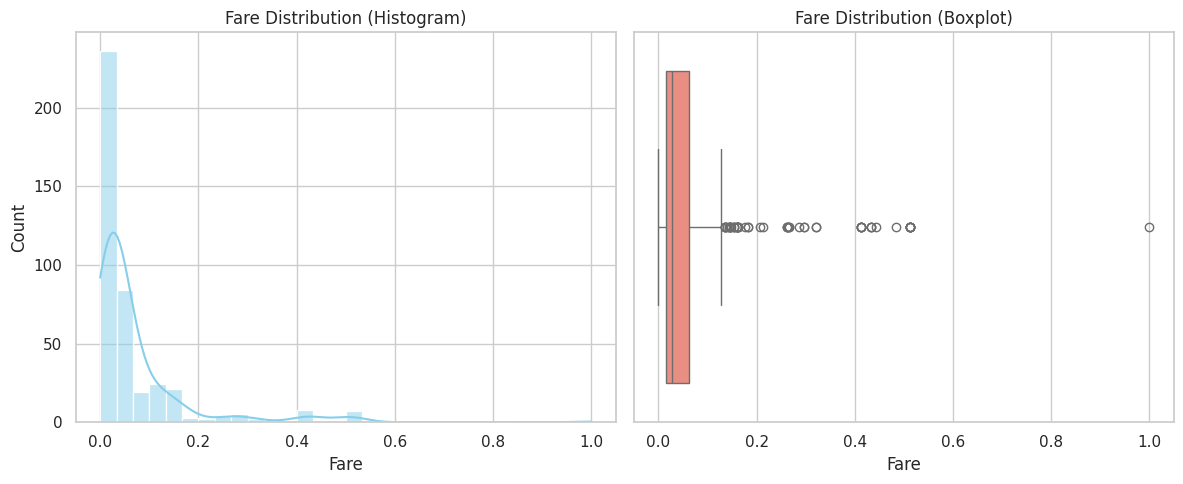

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

features = ['Age', 'Fare']

for feature in features:
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'{feature} Distribution (Histogram)')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='salmon')
    plt.title(f'{feature} Distribution (Boxplot)')

    plt.tight_layout()
    plt.show()
